In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
df=pd.read_csv('wine.csv')

In [3]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [21]:
array=df.values #Performing Clustering On Given Data

In [22]:
array

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [23]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler().fit(array)
x=std_scaler.transform(array)

In [24]:
x

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [27]:
from sklearn.cluster import DBSCAN
db_sc=DBSCAN(eps=0.9,min_samples=6).fit(x)
db_sc
#We will Use DBSCAN first

DBSCAN(eps=0.9, min_samples=6)

In [28]:
cl=pd.DataFrame(db_sc.labels_,columns=['Cluster'])

In [29]:
cl

,Cluster
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
173,-1
174,-1
175,-1
176,-1


In [32]:
cl_df=pd.concat([cl,df],axis=1)

In [33]:
cl_df
#Clustering_Done

,Cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,-1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,-1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,-1,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,-1,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-1,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,-1,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,-1,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,-1,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [37]:
import scipy.cluster.hierarchy as sch


In [36]:
from sklearn.cluster import AgglomerativeClustering as ac
#Now We will Try AgglomerativeClustering

In [38]:
df_ac=df

In [43]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [44]:
df_ac=norm_func(df.iloc[:,:])

In [45]:
df_ac

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.0,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,1.0,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,1.0,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,1.0,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [47]:
model=ac(n_clusters=4,affinity='euclidean',linkage='complete').fit(df_ac)

In [48]:
cluster_labels=pd.Series(model.labels_)

In [49]:
df_ac['Cluster']=cluster_labels

In [51]:
df_ac[df_ac['Cluster']==0]
#Clustering_Done

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
62,0.5,0.694737,0.100791,0.299465,0.381443,0.260870,0.386207,0.305907,0.358491,0.100946,0.215017,0.609756,0.435897,0.251070,0
63,0.5,0.352632,0.077075,0.427807,0.432990,0.184783,0.868966,0.582278,0.113208,0.460568,0.270478,0.601626,0.586081,0.101284,0
64,0.5,0.300000,0.140316,0.625668,0.432990,0.369565,0.313793,0.297468,0.603774,0.195584,0.142491,0.788618,0.351648,0.054922,0
65,0.5,0.352632,0.092885,0.641711,0.386598,0.304348,0.496552,0.487342,0.452830,0.526814,0.283276,0.577236,0.377289,0.285307,0
66,0.5,0.547368,0.053360,0.181818,0.226804,0.086957,0.689655,0.599156,0.245283,0.589905,0.343003,0.520325,0.699634,0.159772,0
67,0.5,0.352632,0.084980,0.299465,0.463918,0.086957,0.389655,0.350211,0.264151,0.198738,0.290102,0.520325,0.809524,0.165478,0
69,0.5,0.310526,0.088933,0.208556,0.319588,0.880435,0.300000,0.198312,0.018868,0.659306,0.133959,0.650407,0.659341,0.313837,0
71,0.5,0.744737,0.152174,0.700535,0.742268,0.173913,0.679310,0.531646,0.150943,0.460568,0.179181,0.715447,0.692308,0.094151,0
72,0.5,0.647368,0.181818,0.470588,0.690722,0.184783,0.310345,0.316456,0.264151,0.195584,0.209898,0.406504,0.553114,0.138374,0
73,0.5,0.515789,0.183794,0.663102,1.000000,0.750000,0.800000,0.537975,0.150943,0.488959,0.176621,0.674797,0.816850,0.504280,0


In [52]:
df_ac[df_ac['Cluster']==1]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
59,0.5,0.352632,0.039526,0.000000,0.000000,0.195652,0.344828,0.048523,0.283019,0.003155,0.057167,0.463415,0.201465,0.172611,1
60,0.5,0.342105,0.071146,0.491979,0.278351,0.336957,0.368966,0.158228,0.943396,0.000000,0.169795,0.626016,0.146520,0.286733,1
61,0.5,0.423684,0.122530,0.352941,0.319588,0.326087,0.358621,0.225738,0.754717,0.066246,0.381399,0.406504,0.117216,0.122682,1
68,0.5,0.607895,0.039526,0.534759,0.329897,0.434783,0.534483,0.202532,0.792453,0.003155,0.161263,0.439024,0.241758,0.336662,1
70,0.5,0.331579,0.171937,0.454545,0.505155,0.358696,0.041379,0.143460,0.452830,0.331230,0.151024,0.346341,0.201465,0.422254,1
75,0.5,0.165789,0.225296,0.299465,0.278351,0.293478,0.217241,0.259494,0.396226,0.233438,0.215017,0.609756,0.318681,0.106990,1
77,0.5,0.213158,0.424901,0.465241,0.381443,0.456522,0.255172,0.206751,0.566038,0.170347,0.116894,0.390244,0.457875,0.158345,1
83,0.5,0.531579,0.616601,0.513369,0.613402,0.163043,0.231034,0.263713,0.905660,0.381703,0.300341,0.292683,0.271062,0.169044,1
90,0.5,0.276316,0.215415,0.513369,0.407216,0.119565,0.213793,0.244726,0.735849,0.388013,0.095563,0.487805,0.366300,0.144080,1
91,0.5,0.255263,0.152174,0.566845,0.587629,0.173913,0.162069,0.191983,0.698113,0.384858,0.197952,0.463415,0.505495,0.122682,1


In [40]:
df_std=scale(df)

In [5]:
df_std

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [6]:
pca=PCA()
pca_values=pca.fit_transform(df_std) #Now Principal Component Analysis

In [7]:
pca_values

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

In [8]:
pca=PCA(n_components=6)
pca_values=pca.fit_transform(df_std)

In [9]:
var=pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 ])

In [10]:
import numpy as np
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([39.54, 57.38, 67.71, 74.34, 80.61, 85.42])

In [11]:
pca.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
        -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
        -0.52978274,  0.27790735,  0.16277625, -0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

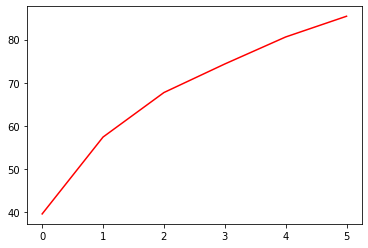

In [12]:
plt.plot(var1,color='red')

In [13]:
pca_values[:,0:1]

array([[-3.5229339 ],
       [-2.52885806],
       [-2.78502898],
       [-3.92258841],
       [-1.40751111],
       [-3.28812981],
       [-2.75057754],
       [-2.39286652],
       [-2.79525633],
       [-3.00559666],
       [-3.67868855],
       [-2.10963477],
       [-2.43845636],
       [-3.67349453],
       [-4.44157575],
       [-2.60892387],
       [-2.47542846],
       [-2.22623243],
       [-3.74226929],
       [-2.3944115 ],
       [-3.33656895],
       [-1.48140399],
       [-2.82806867],
       [-2.00771405],
       [-2.11463604],
       [-1.39753751],
       [-2.13348803],
       [-1.62970383],
       [-2.50760753],
       [-2.55948318],
       [-2.77244452],
       [-2.93513374],
       [-1.99124842],
       [-2.24570987],
       [-1.78698628],
       [-2.22763867],
       [-1.76802847],
       [-1.52317798],
       [-1.87236494],
       [-2.79711434],
       [-2.84093569],
       [-1.1055721 ],
       [-3.30689482],
       [-0.90479842],
       [-2.39683569],
       [-1

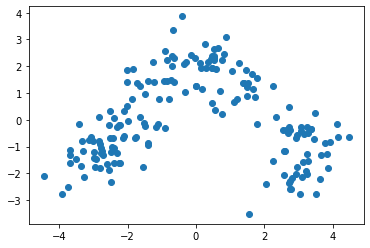

In [14]:
x=pca_values[:,0:1]
y=pca_values[:,1:2]
plt.scatter(x,y)

In [15]:
final_Df = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), df[['Type']]], axis = 1)

In [16]:
final_Df

,pc1,pc2,Type
0,-3.522934,-1.453098,1
1,-2.528858,0.330019,1
2,-2.785029,-1.036936,1
3,-3.922588,-2.768210,1
4,-1.407511,-0.867773,1
...,...,...,...
173,3.627996,-2.206617,3
174,2.942729,-1.752263,3
175,3.027272,-2.756040,3
176,2.755222,-2.293784,3


C:\Users\Rohit Chavan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

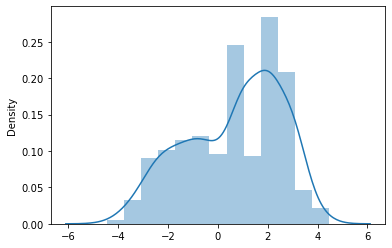

In [17]:
sns.distplot(final_Df)


In [18]:
final_Df

,pc1,pc2,Type
0,-3.522934,-1.453098,1
1,-2.528858,0.330019,1
2,-2.785029,-1.036936,1
3,-3.922588,-2.768210,1
4,-1.407511,-0.867773,1
...,...,...,...
173,3.627996,-2.206617,3
174,2.942729,-1.752263,3
175,3.027272,-2.756040,3
176,2.755222,-2.293784,3


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

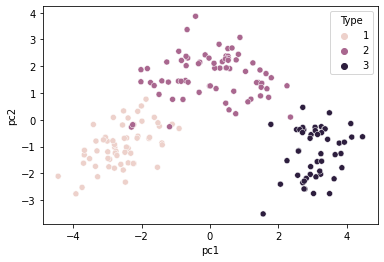

In [19]:
sns.scatterplot(data=final_Df,x='pc1',y='pc2',hue='Type')